# SVC iris multi

In [2]:
import myutils as my
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'sklearn'

### 데이터 준비

In [2]:
X_train, X_test, y_train, y_test = my.get_iris('bin')

In [3]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


### 정규화
- 표준화 (StandardScaler)
- 최소-최대 정규화 (MinMaxScaler)

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) # X_train의 최소-최대값 계산.

MinMaxScaler()

In [5]:
X_train= scaler.transform(X_train)
type(X_train)

numpy.ndarray

In [6]:
# 최소-최대 비에 맞게 스케일링 됨
X_train[:5]

array([[0.33333333, 0.86363636, 0.1025641 , 0.        ],
       [0.40740741, 0.36363636, 0.87179487, 0.82352941],
       [0.59259259, 0.45454545, 0.94871795, 1.        ],
       [0.40740741, 0.54545455, 0.15384615, 0.05882353],
       [1.        , 0.45454545, 0.92307692, 0.76470588]])

In [7]:
# numpy 배열로 변환
y_train = y_train.values
type(y_train)

numpy.ndarray

## 학습

In [8]:
from sklearn.svm import SVC

In [9]:
# coef_ 값을 확인하려면, 'linear' 커널로 분류해야한다.
clf = SVC(kernel = 'linear', random_state = 2022)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=2022)

In [10]:
# 학습데이터로 성능을 확인해보자
clf.score(X_train, y_train)

1.0

In [11]:
clf.coef_

array([[ 0.61113305, -0.81845101,  1.75675951,  1.3825968 ]])

In [12]:
# 절편
clf.intercept_

array([-1.22672043])

## 최종 테스트

In [13]:
X_test = scaler.transform(X_test)
y_test = y_test.values

In [14]:
clf.score(X_test, y_test)

1.0

In [15]:
y_pred = clf.predict(X_test)

In [16]:
my.print_score(y_test, y_pred)

accuracy :  1.0
precision :  1.0
recall :  1.0


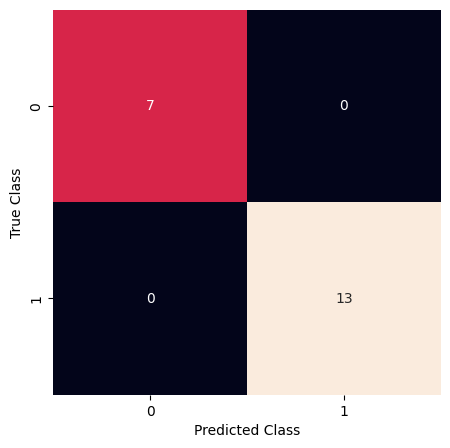

In [17]:
my.plot_confusion_matrix(y_test, y_pred)

## 다중 분류

In [18]:
X_train, X_test, y_train, y_test = my.get_iris()

print(type(X_train), type(X_test))
print(type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [19]:
# 스케일러 선언 후, fit
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [20]:
# transform 을 사용하면 자동으로 nparray로 변경해줌
X_train = scaler.transform(X_train)
type(X_train)

numpy.ndarray

In [21]:
# y_train 도 nparray로 변환
y_train = y_train.values
type(y_train)

numpy.ndarray

In [22]:
from sklearn.svm import SVC
# coef_ 값을 확인하려면, 'linear' 커널로 분류해야한다.
clf = SVC(kernel = 'linear', random_state = 2022)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=2022)

In [23]:
clf.score(X_train, y_train)

0.9666666666666667

In [24]:
clf.coef_

array([[-0.53055058,  1.33970031, -2.11749153, -1.93817589],
       [-0.4691355 ,  0.51529246, -1.58409657, -1.48656971],
       [-0.54963312,  0.75497453, -2.66627722, -3.85961393]])

In [25]:
clf.intercept_

array([0.76496595, 1.17046034, 4.52990526])

#### 최종

In [26]:
# test 데이터도 알맞게 변경해준다
X_test = scaler.transform(X_test)
y_test = y_test.values

In [27]:
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 2], dtype=int64)

In [28]:
clf.score(X_test, y_test)

0.9666666666666667

In [29]:
my.print_score(y_test, y_pred, average='macro')

accuracy :  0.9666666666666667
precision :  0.9629629629629629
recall :  0.9743589743589745


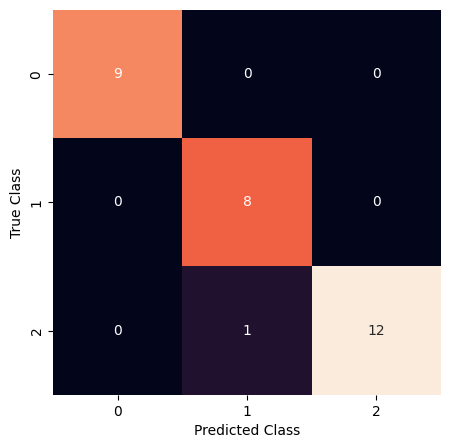

In [30]:
my.plot_confusion_matrix(y_test, y_pred)

### 베스트 모델 찾기 (solution)

In [31]:
X_train, X_test, y_train, y_test = my.get_iris()

print(type(X_train), type(X_test))
print(type(y_train), type(y_test))

# 스케일러 선언 후, fit
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
y_train = y_train.values

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [32]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

#### 각각의 모델 준비 및 성능비교

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

names = ['linear', 'linearSVC', 'poly', 'rbf', 'knn-5', 'knn-9']
models = [
    SVC(kernel = 'linear', C=1),
    LinearSVC(C=1, max_iter=1000), # 1000번 반복한다
    SVC(kernel = 'poly', degree=3),
    SVC(kernel = 'rbf', C=1, gamma=0.7),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=9)
]

scores = {}

for name, model in zip(names, models):
    model.fit(X_train, y_train)
    s = model.score(X_train, y_train)
    print(name, s)
    scores[name] = s

linear 0.9666666666666667
linearSVC 0.95
poly 0.9833333333333333
rbf 0.9666666666666667
knn-5 0.9583333333333334
knn-9 0.9666666666666667


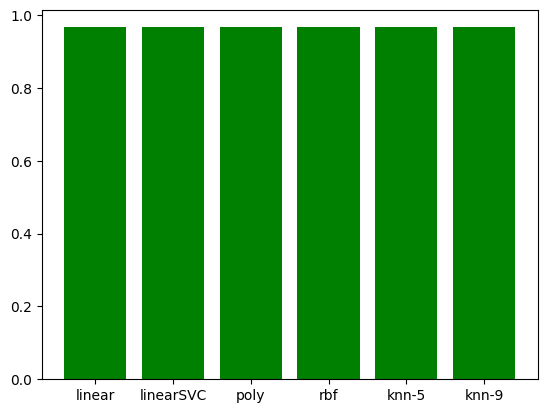

In [34]:
plt.bar(names, scores[name], color='green')
plt.show()

### GridSearch

In [35]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [36]:
# C=1 <- 이 값을 바꿔보면?
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param = [
    {
        # gridSearch 1
        'C' : param_range,
        'gamma' : param_range, 
        'kernel' : ['rbf']
    },
    {
        # gridSearch 2
        'C' : param_range,
        'kernel' : ['linear']
    },
    {
        # gridSearch 3
        'C' : param_range,
        'degree' : [2, 3],
        'kernel' : ['poly']
    }
]

In [37]:
from sklearn.model_selection import GridSearchCV # Gridsearch와 CV를 같이함

# 어떤 모델을 사용할지 정하자
clf = SVC(random_state = 2022)

gs = GridSearchCV(estimator = clf,
                  param_grid = param,
                 scoring = 'accuracy',
                  cv = 3,
                  n_jobs = -1, # 내가 가진 PC의 성능 최대
                  verbose = 3 # 로그 표시 
                 ) # CV = Cross Validation / estimator : 테스트할 모델

gs.fit(X_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3, estimator=SVC(random_state=2022), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [38]:
# Best_estimator
gs.best_estimator_

SVC(C=10, gamma=1, random_state=2022)

In [39]:
# Best_score
gs.best_score_

0.9833333333333334

In [40]:
gs.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [41]:
#

clf = gs.best_params_

### 재학습

In [42]:
clf = SVC(C=10, gamma=1, kernel='rbf', random_state=2022)
clf.fit(X_train, y_train)

SVC(C=10, gamma=1, random_state=2022)

In [43]:
clf.score(X_train, y_train)

0.975

In [44]:
clf.score(X_test, y_test)

C:\Users\014\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.43333333333333335

### RandomizedSearchCV

In [45]:
np.arange(0.001, 1000, 0.5)

array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02])

In [46]:
# C=1 <- 이 값을 바꿔보면?
param_range = np.arange(0.001, 1000, 0.5)

param = [
    {
        # gridSearch 1
        'C' : param_range,
        'gamma' : param_range, 
        'kernel' : ['rbf']
    },
    {
        # gridSearch 2
        'C' : param_range,
        'kernel' : ['linear']
    },
    {
        # gridSearch 3
        'C' : param_range,
        'degree' : [2, 3],
        'kernel' : ['poly']
    }
]

In [47]:
from sklearn.model_selection import RandomizedSearchCV # Gridsearch와 CV를 같이함

# 어떤 모델을 사용할지 정하자
clf = SVC(random_state = 2022)

rs = RandomizedSearchCV(estimator = clf,
                  param_distributions = param,
                  n_iter= 100,
                 scoring = 'accuracy',
                  cv = 3,
                  n_jobs = -1, # 내가 가진 PC의 성능 최대
                  verbose = 3 # 로그 표시 
                 ) # CV = Cross Validation / estimator : 테스트할 모델

rs.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=2022), n_iter=100,
                   n_jobs=-1,
                   param_distributions=[{'C': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'gamma': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'kernel': ['rbf']},
                                        {'C': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'kernel': ['linear']},
                                        {'C': array([1.00000e-03, 5.01000e-01, 1.00100e+00, ..., 9.98501e+02,
       9.99001e+02, 9.99501e+02]),
                                         'degree': [2, 3],
                                         'kernel': ['poly']}],
                   scoring='accuracy', verbose=3)

In [48]:
print(rs.best_estimator_)
print(rs.best_score_)
print(rs.best_params_)

SVC(C=118.001, gamma=28.501, random_state=2022)
0.9500000000000001
{'kernel': 'rbf', 'gamma': 28.501, 'C': 118.001}


#### 재학습

In [49]:
clf = SVC(C=1.001, gamma=18.501, kernel='rbf', random_state=2022)
clf.fit(X_train, y_train)

SVC(C=1.001, gamma=18.501, random_state=2022)

In [50]:
clf.score(X_train, y_train)

0.9833333333333333

In [1]:
# X_test도 스케일링을 해준다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)
X_test

ModuleNotFoundError: No module named 'sklearn'

In [51]:
clf.score(X_test, y_test)

C:\Users\014\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.43333333333333335

#### Grid의 param-grid는 정해진 값들 중에서 뽑아서 사용
#### random의 param-distribution은 값에 따른 분포도를 그리고 그 중에서 random으로 뽑아서 사용